This notebook will serve to demonstrate Retina functionality within the Jupyter notebook as it relates to Matplotlib.

# Retina, Matplotlib, and the Jupyter Notebook

Retina subclasses the Matplotlib `Axes` hierarchy. Retina axes can be generated from a call to Pyplot's `subplot` function. Let's walk through how this is done.

## Retina 2D Functionality

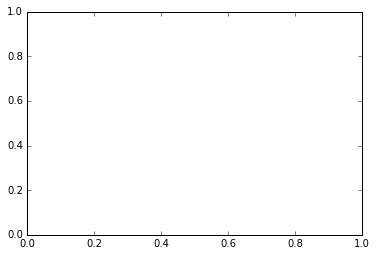

In [1]:
import retina.core.axes
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

fig = plt.figure()
ax1 = plt.subplot('111', projection='Fovea2D')

Let's set up our plot so as to make it look more professional.

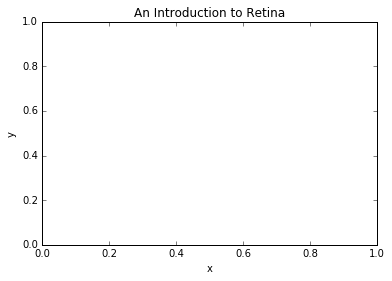

In [2]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('An Introduction to Retina')

Not too shabby. I find it annoying that the label for the y-axis is tilted sideways. Maybe someone more familiar with Matplotlib than myself could propose a solution for this.

Now that we have our axes looking respectable, let's add some data to our plot. We will organize our data via the use of Retina's `Layer2D` class. It provides a way of grouping Matplotlib artists so that they can be styled, displayed, hidden, etc. in tandem. Let's start by plotting some trig functions. 

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi)
sin_y = np.sin(x)
cos_y = np.cos(x)

sin = ax1.add_layer("sin")
cos = ax1.add_layer("cos")

sin.add_data(x, sin_y)
cos.add_data(x, cos_y)

ax1.build_layer("sin", color="green", linestyle="dashed", label="sin(x)")
ax1.build_layer("cos", color="blue", linestyle="dashed", label="cos(x)")

As you can see, we have created two layers: one to hold the plot of $\sin(x)$ and the other to hold the plot of $\cos(x)$. Note that the `Layer2D` objects are not constructed explicitly by the user. This work is done by the `add_layer` function of the `Fovea2D` axes class. This way the layer is attached to an explicit axes and isn't left floating in a free-form void holding unvisualizable data. The `add_layer` function, however, returns the `Layer2D` instance which can then be saved to an explicit reference variable as was done here. The work of plotting is performed by the Axes' build_layer function and the keyword arguments are passed to Pyplot's default `plot` function. The layer-specific methods such as adding data are called from the Layer2D object directly. As a design consideration for future development, it might be useful to just attach a plot method to the layer class that works in the same way as this one. It would probably be easier to use since one could just use the layer instances to plot directly without having to pass layer names to the build_layer method.

Now, all that's left to do is show the plot.

In [4]:
plt.show()

Here is another issue that I can't figure out. If all the plotting code is executed simultaneously in the notebook, the plot generates fine. If, however, the code is run in individual cells, the plots are never generated. I'm not sure if this is a Matplotlib-Jupyter issue or a Retina issue. I think it's probably the former, but maybe some of the Jupyter devs can address this. This seems to happen regardless of whether %matplotlib inline or %matplotlib notebook magics are used, with the caveat that %matplotlib notebook allows generated plots to interact effectively with calls from subsequent cells **provided** that the plot is generated correctly the first time. It seems that splitting the plotting code across cells causes major hiccups.

Here is an example where all the code is run simultaneously...

<IPython.core.display.Javascript object>


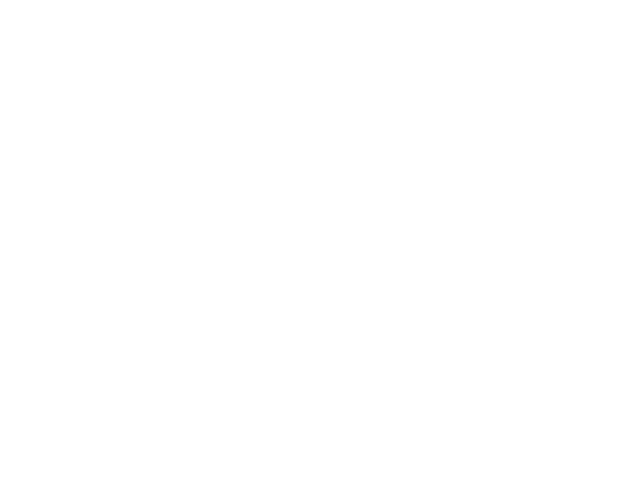

In [5]:
import retina.core.axes
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

fig2 = plt.figure()
ax2 = plt.subplot('111', projection='Fovea2D')

plt.xlabel('x')
plt.ylabel('y')
plt.title('An Introduction to Retina')
ax2.set_xlim(-2 * np.pi, 2 * np.pi)

x = np.linspace(-2 * np.pi, 2 * np.pi)
sin_y = np.sin(x)
cos_y = np.cos(x)

sin = ax2.add_layer("sin")
cos = ax2.add_layer("cos")

sin.add_data(x, sin_y)
cos.add_data(x, cos_y)

ax2.build_layer("sin", color="green", linestyle="dashed", label="sin(x)")
ax2.build_layer("cos", color="blue", linestyle="dashed", label="cos(x)")

Let's try adding some lines to our plot.

In [6]:
sin.add_vline(0)
sin.add_hline(0)

And now let's try toggling the display of the sin layer.

In [7]:
sin.hide()

In [8]:
sin.show()

In [9]:
sin.toggle_display()

In [10]:
sin.toggle_display()

We can also make plots in layers "boldfaced".

In [11]:
cos.bold()

Bolding effects can be applied in succession.

In [12]:
cos.bold()

And they can be undone.

In [13]:
cos.unbold()
cos.unbold()

I'm not sure if the Jupyter team has considered this, but it would be nice if the %matplotlib notebook mode generated new plots each time a cell was run. The way things currently stand, I have to scroll up to the original plot in order to watch my changes propagate. This scrolling can quickly become infeasible in lengthier notebooks.

## Retina 3D Functionality

Now, let's try creating a 3D plot using Retina's 3D axes.

<IPython.core.display.Javascript object>


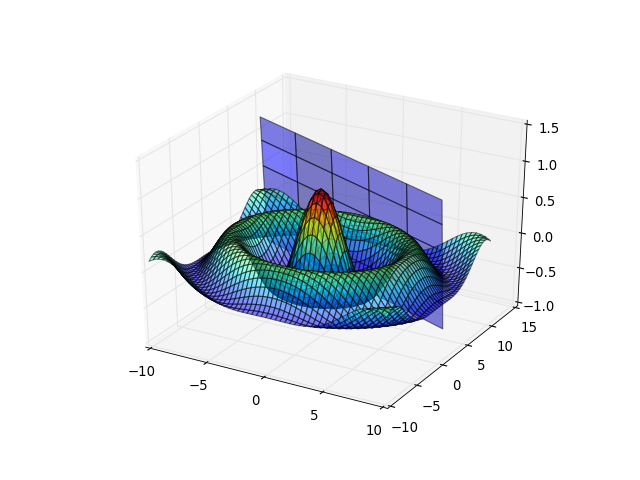

In [14]:
import retina.core.axes
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import jn

%matplotlib notebook

fig = plt.figure()
ax = plt.subplot('111', projection='Fovea3D')

points = np.linspace(-10, 10, 51)
X, Y = np.meshgrid(points, points)
R = np.sqrt(X**2 + Y**2)
Z = jn(0,R)

surfing_usa = ax.add_layer('surfing_usa')
surfing_usa.add_data(X, Y, Z)

ax.build_layer('surfing_usa', plot=ax.plot_surface, rstride=1, cstride=1, cmap='jet')

In [15]:
surfing_usa.hide()

In [16]:
surfing_usa.show()

We can add planes to 3D layers by specifying a point on the plane and a normal vector to the plane.

In [17]:
surfing_usa.add_plane([0, 3, 5], [1, 2, 1])

We can bound the data contained in layers, either in a box (for 3D Layers) or in a rectangle/circle (for 2D layers).

In [18]:
surfing_usa.bound()

And we can remove the bounds.

In [19]:
surfing_usa.unbound()

We can also set arbitrary properties for the plots contained in layers. For example, let's edit the alpha value of our 3D plots.

In [20]:
surfing_usa.set_prop(alpha=0.5)

## Diagnostic Tracking

Retina also binds a diagnostic tracker class to layer instances which is linked to a "calc context". As part of the calc context, users can provide sandbox functions and see their plots updated in real-time as data within the layer changes. Let's work through an example use case.

<IPython.core.display.Javascript object>


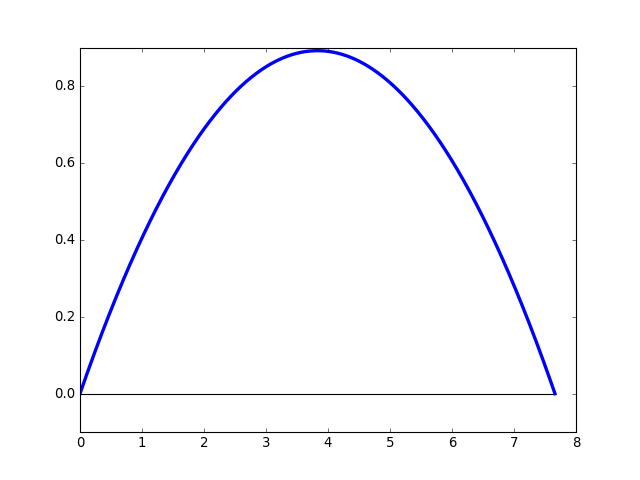

<IPython.core.display.Javascript object>


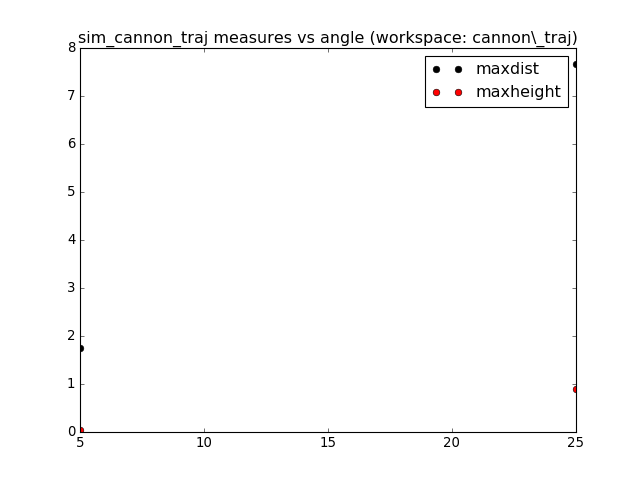

Exception ignored in: <bound method Vode_ODEsystem.__del__ of Generator cannon>
Traceback (most recent call last):
  File "/usr/local/lib/python3.4/dist-packages/PyDSTool-0.90.2-py3.4.egg/PyDSTool/Generator/Vode_ODEsystem.py", line 923, in __del__
    ODEsystem.__del__(self)
  File "/usr/local/lib/python3.4/dist-packages/PyDSTool-0.90.2-py3.4.egg/PyDSTool/Generator/ODEsystem.py", line 525, in __del__
    ctsGen.__del__(self)
  File "/usr/local/lib/python3.4/dist-packages/PyDSTool-0.90.2-py3.4.egg/PyDSTool/Generator/baseclasses.py", line 1430, in __del__
    Generator.__del__(self)
  File "/usr/local/lib/python3.4/dist-packages/PyDSTool-0.90.2-py3.4.egg/PyDSTool/Generator/baseclasses.py", line 1381, in __del__
    delattr(eval(finfo[0]), fname)
SyntaxError: unexpected EOF while parsing (<string>, line 0)


In [2]:
% matplotlib notebook

from IPython.display import display
from ipywidgets import widgets
textbox = widgets.Text()

display(textbox)

def handle_submit(sender):
    fn = text.value
    
from __future__ import division
import PyDSTool as dst
#import PyDSTool.Toolbox.phaseplane as pp
import matplotlib.pyplot as plt
import retina.core.axes
import retina.core.layer
import retina.core.calc_context as cc
import math
import numpy as np


fig = plt.figure()
ax = plt.subplot('111', projection='Fovea2D')
layer = ax.add_layer('test_layer')
tracker = layer.tracker

def make_vel_ics(speed, ang):
    rad = math.pi*(ang)/180.
    return {'vx': speed*math.cos(rad),
            'vy': speed*math.sin(rad)}


def make_shooter():
    # no friction
    # cos(atan(x)) = 1/(sqrt(1+x^2))
    Fx_str = '0' # '-speed_fn()*cos(atan2(vy,vx))'
    Fy_str = '-10'

    DSargs = dst.args()
    DSargs.varspecs = {'vx': Fx_str, 'x': 'vx',
                       'vy': Fy_str, 'y': 'vy',
                       'Fx_out': 'Fx(x,y)', 'Fy_out': 'Fy(x,y)',
                       'speed': 'speed_fn(vx, vy)',
                       'bearing': '90-180*atan2(vy,vx)/pi'}

    auxfndict = {'Fx': (['x', 'y'], Fx_str),
                 'Fy': (['x', 'y'], Fy_str),
                 'speed_fn': (['vx', 'vy'], 'sqrt(vx*vx+vy*vy)'),
                 }
    DSargs.auxvars = ['Fx_out', 'Fy_out', 'speed', 'bearing']

    DSargs.fnspecs = auxfndict
    DSargs.algparams = {'init_step':0.001,
                        'max_step': 0.1,
                        'max_pts': 20000,
                        'maxevtpts': 2,
                        'refine': 5}

    ground_event = dst.Events.makeZeroCrossEvent('y', -1,
                                                 {'name': 'ground',
                                                  'eventtol': 1e-3,
                                                  'precise': True,
                                                  'term': True},
                                                 varnames=['y'],
                                                 targetlang='python')
    peak_event = dst.Events.makeZeroCrossEvent('vy', -1,
                                                 {'name': 'peak',
                                                  'eventtol': 1e-3,
                                                  'precise': True,
                                                  'term': False},
                                                 varnames=['vy'],
                                                 targetlang='python')
    DSargs.events = [ground_event, peak_event]
    DSargs.checklevel = 2
    DSargs.ics = {'x': 0, 'y': 0,
                  'vx': 0, 'vy': 0}
    DSargs.ics.update(make_vel_ics(5,20))
    DSargs.name = 'cannon'
    DSargs.tdomain = [0, 100000]
    DSargs.tdata = [0, 10]
    return dst.embed(dst.Generator.Vode_ODEsystem(DSargs))


shooter = make_shooter()

# sim.model is a PyDSTool Model
sim = dst.args(tracked_objects=[],
               model=shooter,
               name='sim_cannon_traj',
               pts=None)


calc = cc.calc_context(sim, 'cannon_traj')
w = calc.workspace


shot_num = 0
def go(speed, angle, do_tracker=True):
    global shot_num, w
    shot_num += 1
    w.angle = angle
    w.speed = speed
    sim.model.set(ics=make_vel_ics(speed, angle))
    sim.model.compute('shot%i' % shot_num)
    sim.pts = sim.model.sample('shot%i' % shot_num)
    if do_tracker:
        ax.cla()
        ax.plot(sim.pts['x'], sim.pts['y'], 'b-', lw=3)
        ax.hlines(0, 0, max(sim.pts['x']))
        plt.show()
        calc()
        tracker.show()
        plt.show()

# initialize
go(30, 10, do_tracker=False)


# call tracker every loop to show all sim_stub tracked objects
# (= tracker_plotter objects)

#fig = plt.figure(1)
#ax = plt.gca()


# fig, ax = plt.subplots()

max_dist = cc.make_measure('maxdist',
                              'max(sim.pts["x"])')
max_height = cc.make_measure('maxheight',
                              'max(sim.pts["y"])')

calc.attach((max_dist, max_height))

tracker(calc, 2, ('angle', 'maxdist', 'ko'),
        clear_on_refresh=False)
tracker(calc, 2, ('angle', 'maxheight', 'ro'),
        clear_on_refresh=False)

def make_iter_angle():
    for angle in np.linspace(5, 85, 10):
        yield angle

iter_angle = make_iter_angle()

# rerun this ten times!
go(10, iter_angle.__next__())

# or call directly

go(10, 25)